#**BREAST CANCER DETECTION**

####IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import warnings

In [ ]:
warnings.filterwarnings("ignore")

####**DATA PRE-PROCESSING**

In [ ]:
df = pd.read_csv('/content/sample_data/data.csv')

In [ ]:
df = df.drop(columns=['Unnamed: 32', 'id'])

In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.iloc[:10]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [ ]:
df.shape

(569, 31)

In [ ]:
df.dtypes

,0
diagnosis,object
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64
symmetry_mean,float64


In [ ]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
df.isnull().values.any()

False

In [ ]:
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


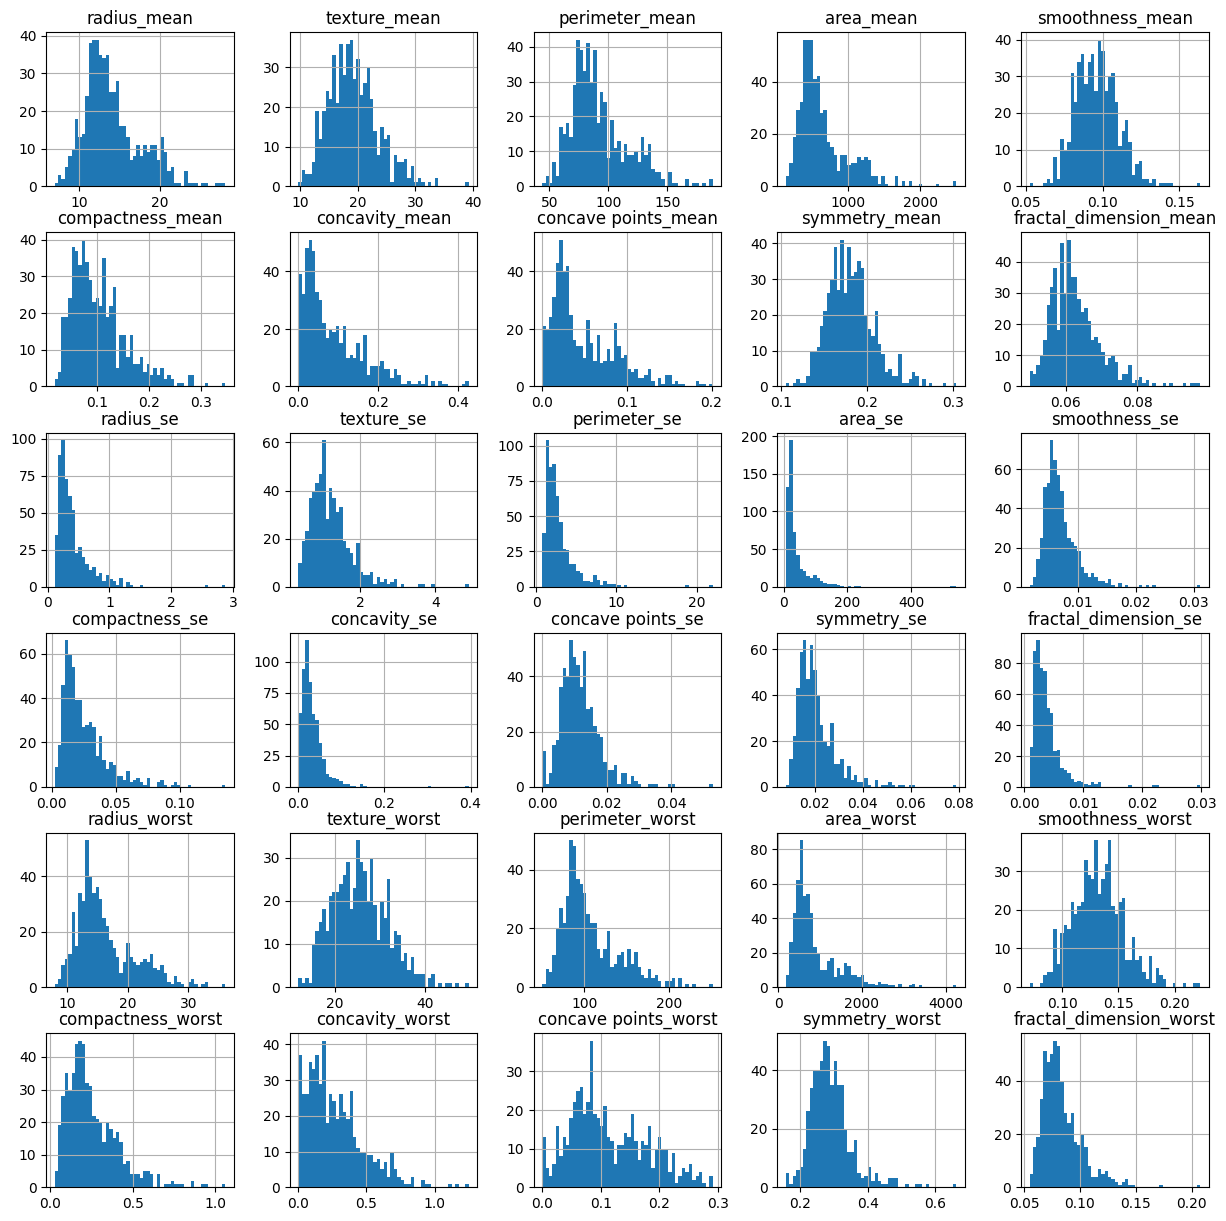

In [ ]:
df.hist(bins=50, figsize=(15, 15))
plt.show()

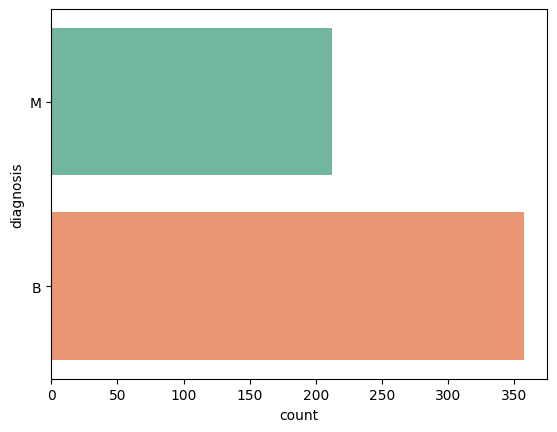

In [ ]:
ax = sns.countplot(y='diagnosis', data=df, palette='Set2')

diagnosis
B    357
M    212
dtype: int64


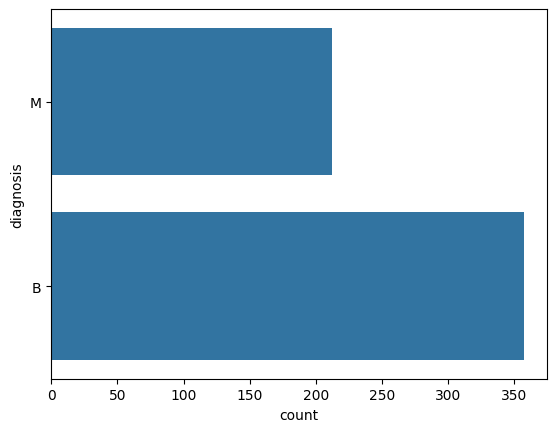

In [ ]:
print(df.groupby('diagnosis').size())
sns.countplot(df['diagnosis'],label="Count")
plt.show()

#####**BOX PLOT TO CHECK FOR OUTLIERS IN EACH CATEGORY**

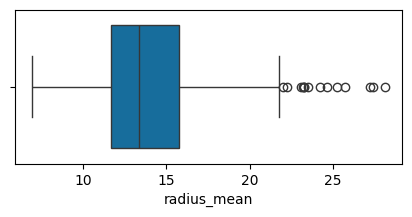

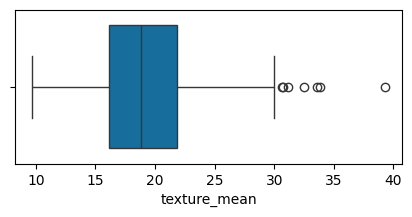

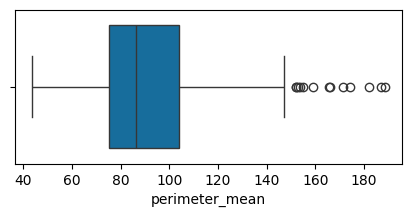

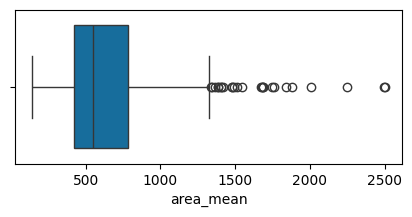

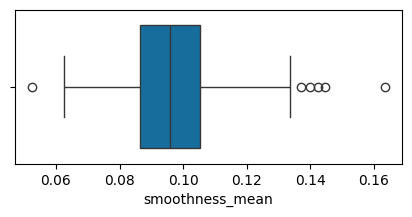

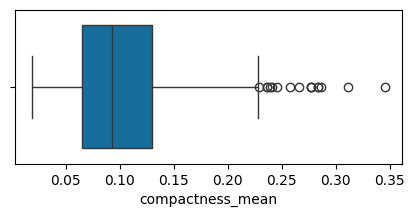

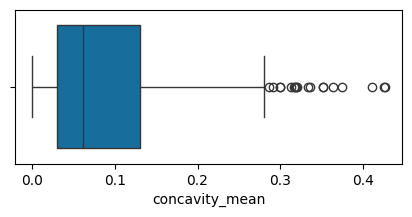

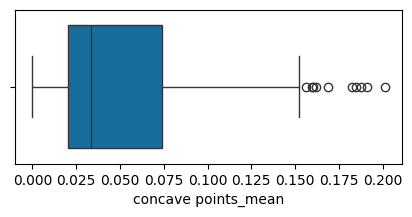

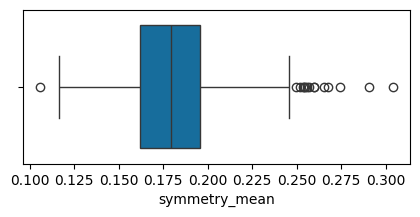

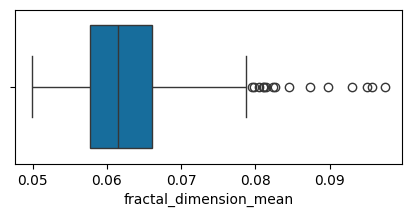

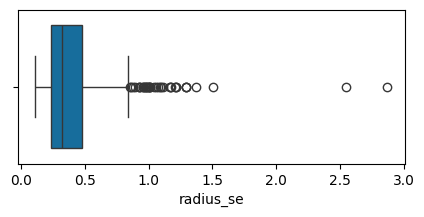

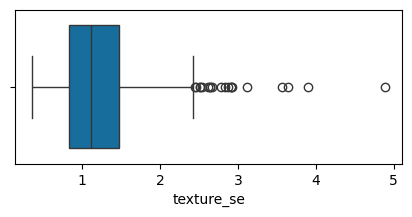

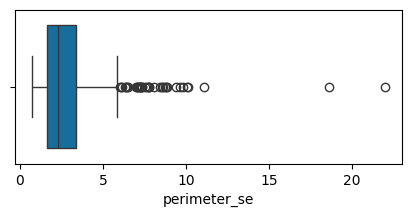

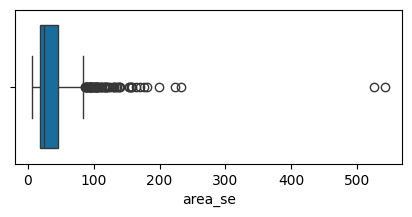

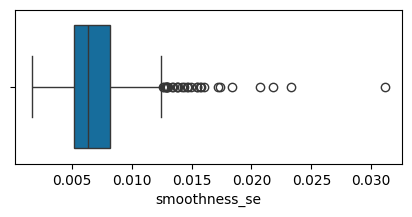

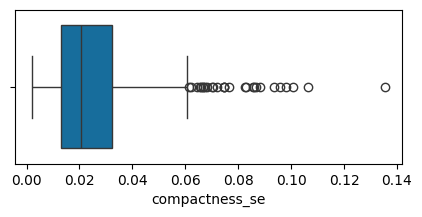

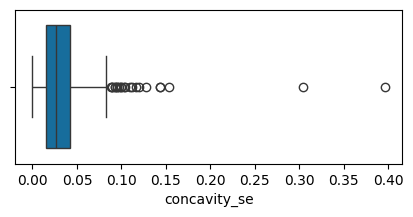

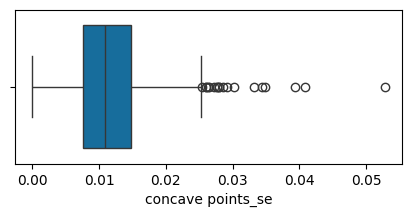

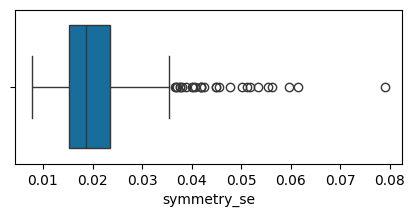

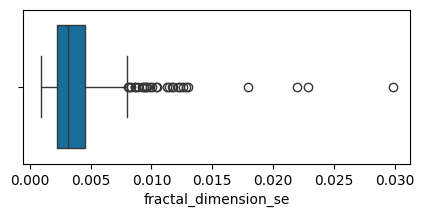

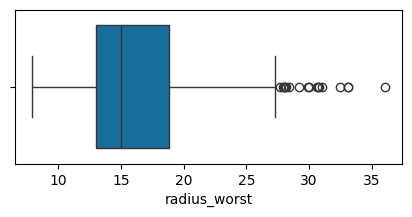

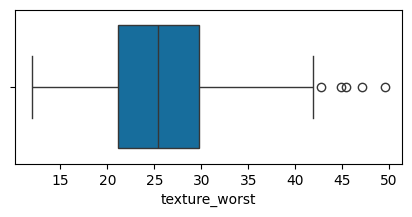

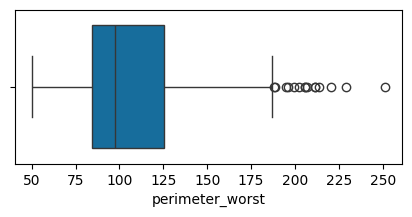

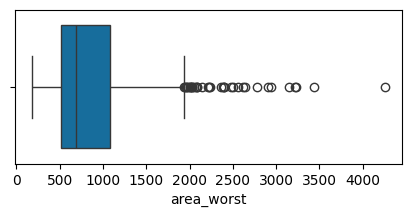

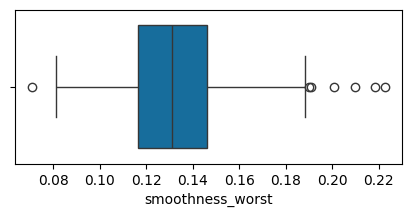

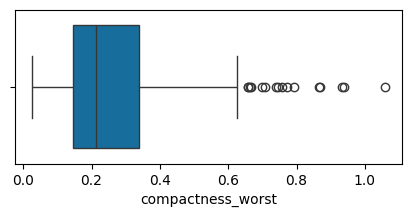

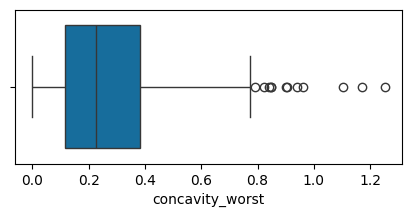

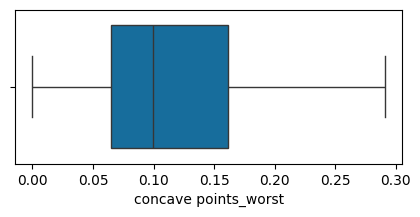

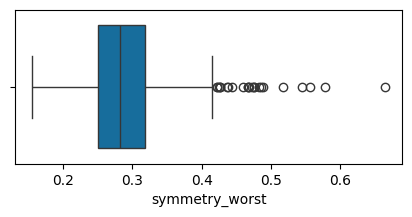

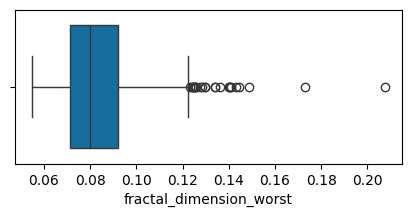

In [ ]:
def boxPlot(dff):
    d = dff.drop(columns=['diagnosis'])
    for column in d:
        plt.figure(figsize=(5, 2))
        sns.boxplot(x=column, data=d, palette="colorblind")

boxPlot(df)

In [ ]:
import numpy as np

for column in df.select_dtypes(include=['object']).columns:
    if column != 'diagnosis':
        try:
            df[column] = pd.to_numeric(df[column], errors='coerce')
        except ValueError:
            print(f"Could not convert column '{column}' to numeric. Check for non-numeric values.")

Q1 = df.select_dtypes(include=np.number).quantile(0.25)
Q3 = df.select_dtypes(include=np.number).quantile(0.75)
inter_quartile_range = Q3 - Q1

In [ ]:
numeric_features = df.select_dtypes(include=np.number)
Q1 = numeric_features.quantile(0.25)
Q3 = numeric_features.quantile(0.75)
inter_quartile_range = Q3 - Q1

filtered_numeric = numeric_features[
    ~((numeric_features < (Q1 - 1.5 * inter_quartile_range)) |
      (numeric_features > (Q3 + 1.5 * inter_quartile_range))).any(axis=1)
]

df_out = df.loc[filtered_numeric.index]

df.shape, df_out.shape

((569, 31), (398, 31))

#####**SEPARATE LABELS AND FEATURES**

In [ ]:
X = df_out.drop(columns=['diagnosis'])
y = df_out['diagnosis']

#####**CONVERSION OF CATEGORICAL VALUES TO NUMERIC VALUES**

In [ ]:
label = LabelEncoder()
y = label.fit_transform(y)
y[:20]

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

#####**SPLITTING TRAINING AND TESTING DATA**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((278, 30), (120, 30), (278,), (120,))

#####**CROSS VALIDATION FUNCTION**

In [ ]:
def tn(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)[0, 0]


def fp(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)[0, 1]


def fn(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)[1, 0]


def tp(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)[1, 1]


def acc(y_true, y_pred):
    return accuracy(y_true, y_pred)

#####**CUSTOM ACCURACY**

In [ ]:
def accuracy(y_true, y_pred):
    cnf_matrix = confusion_matrix(y_true, y_pred)
    N = sum(map(sum, cnf_matrix))
    tp = cnf_matrix[1, 1]
    tn = cnf_matrix[0, 0]
    return round((tp + tn) / N, 2)

In [ ]:
scoring = {'accuracy': make_scorer(metrics.accuracy_score), 'prec': 'precision'}
scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn),
           'fp': make_scorer(fp), 'fn': make_scorer(fn),
           'acc': make_scorer(acc)}

In [ ]:
def print_result(result):
    print("True Positive: ", result['test_tp'])
    print("True Negative: ", result['test_tn'])
    print("False Negative: ", result['test_fn'])
    print("False Positive: ", result['test_fp'])
    print("Accuracy: ", result['test_acc'])

In [ ]:
acc = []
roc = []

###**MODELS**

#####**NAIVE BAYES**

In [ ]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

ac = accuracy_score(y_test, y_pred)
acc.append(ac)
ac_train = accuracy_score(y_train, y_pred_train)
rc = roc_auc_score(y_test, y_pred)
roc.append(rc)
print("Naive Bayes : ")
print("Training Set Accuracy : ", ac_train)
print("Test Set Accuracy {0} ROC {1}".format(ac, rc))

Naive Bayes : 
Training Set Accuracy :  0.9496402877697842
Test Set Accuracy 0.9333333333333333 ROC 0.9114583333333334


In [ ]:
result = cross_validate(model, X_train, y_train, scoring=scoring, cv=10)
print_result(result)

True Positive:  [6 7 5 7 6 8 8 8 7 7]
True Negative:  [20 21 18 21 20 20 19 18 18 20]
False Negative:  [1 0 2 0 2 0 0 0 0 0]
False Positive:  [1 0 3 0 0 0 1 2 2 0]
Accuracy:  [0.93 1.   0.82 1.   0.93 1.   0.96 0.93 0.93 1.  ]


#####**LOGISTIC REGRESSION**

In [ ]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
LR.score(X_train, y_train)
y_pred = LR.predict(X_test)
y_pred_train = model.predict(X_train)

# find accuracy
ac = accuracy_score(y_test, y_pred)
acc.append(ac)
ac_train = accuracy_score(y_train, y_pred_train)
# Code for ROC_AUC curve
rc = roc_auc_score(y_test, y_pred)
roc.append(rc)
print("Logistic Regression : ")
print("Training Set Accuracy : ", ac_train)
print("Test Set Accuracy {0} ROC {1}".format(ac, rc))

Logistic Regression : 
Training Set Accuracy :  0.9496402877697842
Test Set Accuracy 0.925 ROC 0.875


In [ ]:
result = cross_validate(LR, X_train, y_train, scoring=scoring, cv=10)
print_result(result)

True Positive:  [6 6 4 5 7 8 8 7 6 6]
True Negative:  [20 21 20 21 20 20 19 19 20 20]
False Negative:  [1 1 3 2 1 0 0 1 1 1]
False Positive:  [1 0 1 0 0 0 1 1 0 0]
Accuracy:  [0.93 0.96 0.86 0.93 0.96 1.   0.96 0.93 0.96 0.96]


#####**SUPPORT VECTOR MACHINE**

In [ ]:
model = SVC(gamma='auto', kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

ac = accuracy_score(y_test, y_pred)
acc.append(ac)
ac_train = accuracy_score(y_train, y_pred_train)
rc = roc_auc_score(y_test, y_pred)
roc.append(rc)
print("Support Vector Machine : ")
print("Training Set Accuracy : ", ac_train)
print("Test Set Accuracy {0} ROC {1}".format(ac, rc))

Support Vector Machine : 
Training Set Accuracy :  0.9748201438848921
Test Set Accuracy 0.9416666666666667 ROC 0.9010416666666667


In [ ]:
result = cross_validate(model, X_train, y_train, scoring=scoring, cv=10)
print_result(result)

True Positive:  [6 6 4 6 7 8 8 8 6 6]
True Negative:  [20 20 21 21 20 20 19 19 20 20]
False Negative:  [1 1 3 1 1 0 0 0 1 1]
False Positive:  [1 1 0 0 0 0 1 1 0 0]
Accuracy:  [0.93 0.93 0.89 0.96 0.96 1.   0.96 0.96 0.96 0.96]


#####**KNN**

In [ ]:
model = KNeighborsClassifier(n_neighbors=9, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

ac = accuracy_score(y_test, y_pred)
acc.append(ac)
ac_train = accuracy_score(y_train, y_pred_train)
rc = roc_auc_score(y_test, y_pred)
roc.append(rc)
print("K-Nearest Neighbors : ")
print("Training Set Accuracy : ", ac_train)
print("Accuracy {0} ROC {1}".format(ac, rc))

K-Nearest Neighbors : 
Training Set Accuracy :  0.9280575539568345
Accuracy 0.9 ROC 0.765625


In [ ]:
result = cross_validate(model, X_train, y_train, scoring=scoring, cv=10)
print_result(result)

True Positive:  [6 6 4 5 4 8 7 7 7 5]
True Negative:  [19 21 21 21 20 20 19 19 19 20]
False Negative:  [1 1 3 2 4 0 1 1 0 2]
False Positive:  [2 0 0 0 0 0 1 1 1 0]
Accuracy:  [0.89 0.96 0.89 0.93 0.86 1.   0.93 0.93 0.96 0.93]


#####**RANDOM FOREST**

In [ ]:
model = RandomForestClassifier(n_estimators=20, max_depth=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

ac = accuracy_score(y_test, y_pred)
acc.append(ac)
ac_train = accuracy_score(y_train, y_pred_train)
rc = roc_auc_score(y_test, y_pred)
roc.append(rc)
print("Random Forest : ")
print("Training Set Accuracy : ", ac_train)
print("Accuracy {0} ROC {1}".format(ac, rc))

Random Forest : 
Training Set Accuracy :  1.0
Accuracy 0.9416666666666667 ROC 0.8697916666666667


In [ ]:
result = cross_validate(model, X_train, y_train, scoring=scoring, cv=10)
print_result(result)

True Positive:  [7 7 5 7 6 8 7 8 6 6]
True Negative:  [20 21 19 21 20 20 20 19 19 20]
False Negative:  [0 0 2 0 2 0 1 0 1 1]
False Positive:  [1 0 2 0 0 0 0 1 1 0]
Accuracy:  [0.96 1.   0.86 1.   0.93 1.   0.96 0.96 0.93 0.96]


###**COMPARISON**

Text(0.5, 0, 'Algortihms')

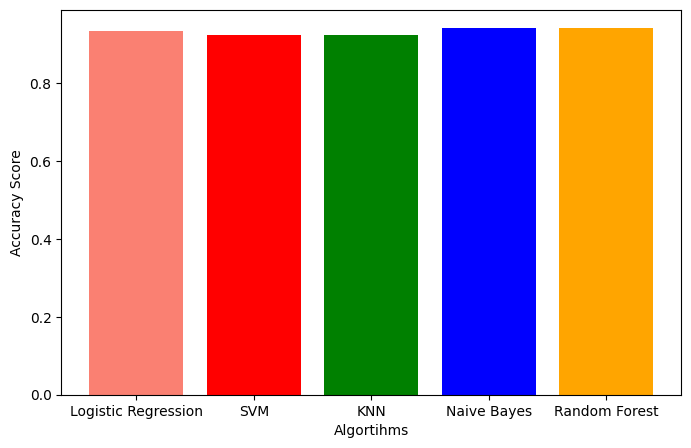

In [ ]:
plt.figure(figsize=(8, 5))
acc = acc[:5]
plt.bar(['Logistic Regression', 'SVM', 'KNN', 'Naive Bayes', 'Random Forest'], acc,
        color=['salmon', 'r', 'g', 'b', 'orange'], label='Accuracy')
plt.ylabel('Accuracy Score')
plt.xlabel('Algortihms')

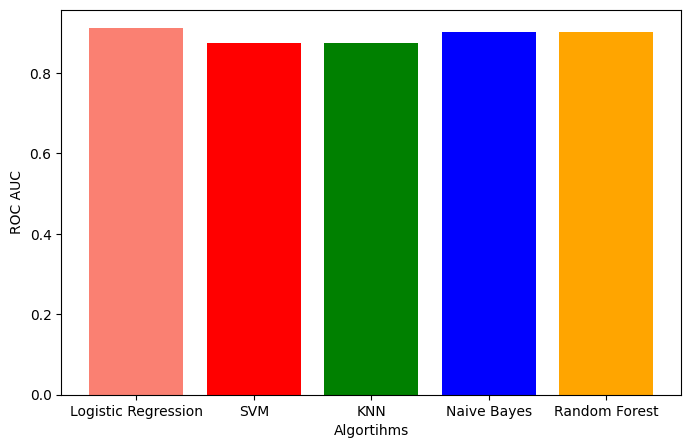

In [ ]:
plt.figure(figsize=(8, 5))
roc = roc[:5]
plt.bar(['Logistic Regression', 'SVM', 'KNN', 'Naive Bayes', 'Random Forest'], roc,
        color=['salmon', 'r', 'g', 'b', 'orange'], label='ROC AUC')
plt.ylabel('ROC AUC')
plt.xlabel('Algortihms')
plt.show()

In [ ]:
compare = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'KNN', 'Naive Bayes', 'Random Forest'],
    'Accuracy': acc,
    'ROC AUC': roc
})

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

file_path = 'data.csv'
data = pd.read_csv("/content/sample_data/data.csv")

data = data.drop(columns=['id', 'Unnamed: 32'])

label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])  # Malignant = 1, Benign = 0

X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(random_state=42, n_estimators=100)
rf_classifier.fit(X_train, y_train)

print("\nPlease enter the values for the following features:")

# Prompt user for each feature in the dataset
input_features = {}
for feature in X.columns:
    value = float(input(f"Enter value for {feature}: "))
    input_features[feature] = [value]
new_data = pd.DataFrame(input_features)

# Predict diagnosis
predictions = rf_classifier.predict(new_data)
predicted_labels = label_encoder.inverse_transform(predictions)

print("\nPredicted Outcome:")
print(predicted_labels[0])



Please enter the values for the following features:
Enter value for radius_mean: 11.34
Enter value for texture_mean: 21.26
Enter value for perimeter_mean: 72.48
Enter value for area_mean: 396.5
Enter value for smoothness_mean: 0.08579
Enter value for compactness_mean: 0.06575
Enter value for concavity_mean: 0.05133
Enter value for concave points_mean: 0.01899
Enter value for symmetry_mean: 0.1487
Enter value for fractal_dimension_mean: 0.06529
Enter value for radius_se: 0.2344
Enter value for texture_se: 0.9861
Enter value for perimeter_se: 1.597
Enter value for area_se: 16.41
Enter value for smoothness_se: 0.009113
Enter value for compactness_se: 0.01557
Enter value for concavity_se: 0.02443
Enter value for concave points_se: 0.006435
Enter value for symmetry_se: 0.01568
Enter value for fractal_dimension_se: 0.002477
Enter value for radius_worst: 13.01
Enter value for texture_worst: 29.15
Enter value for perimeter_worst: 83.99
Enter value for area_worst: 518.1
Enter value for smoothn